# First rough results of MSAD-E

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Directory containing the CSV files

In [43]:
csv_dir = '/home/sylli/Documents/MSAD-E/reports/first_results_04_2024'
save_fig_path = '/home/sylli/Documents/MSAD-E/reports/'

### Iterate over CSV files in the directory

In [46]:
data = []

for filename in os.listdir(csv_dir):
    if filename.endswith('.csv'):
        filepath = os.path.join(csv_dir, filename)
        df = pd.read_csv(filepath, index_col=0)  # Assuming tab-separated data
        data.append(df)

# Concatenate data from all CSVs into a single DataFrame
df = pd.concat(data)

In [114]:
# Reshape DataFrame for boxplot
reshaped_df = df.reset_index().melt(id_vars=['Combine Method'], var_name='k')

In [116]:
np.arange(0, 1, 0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

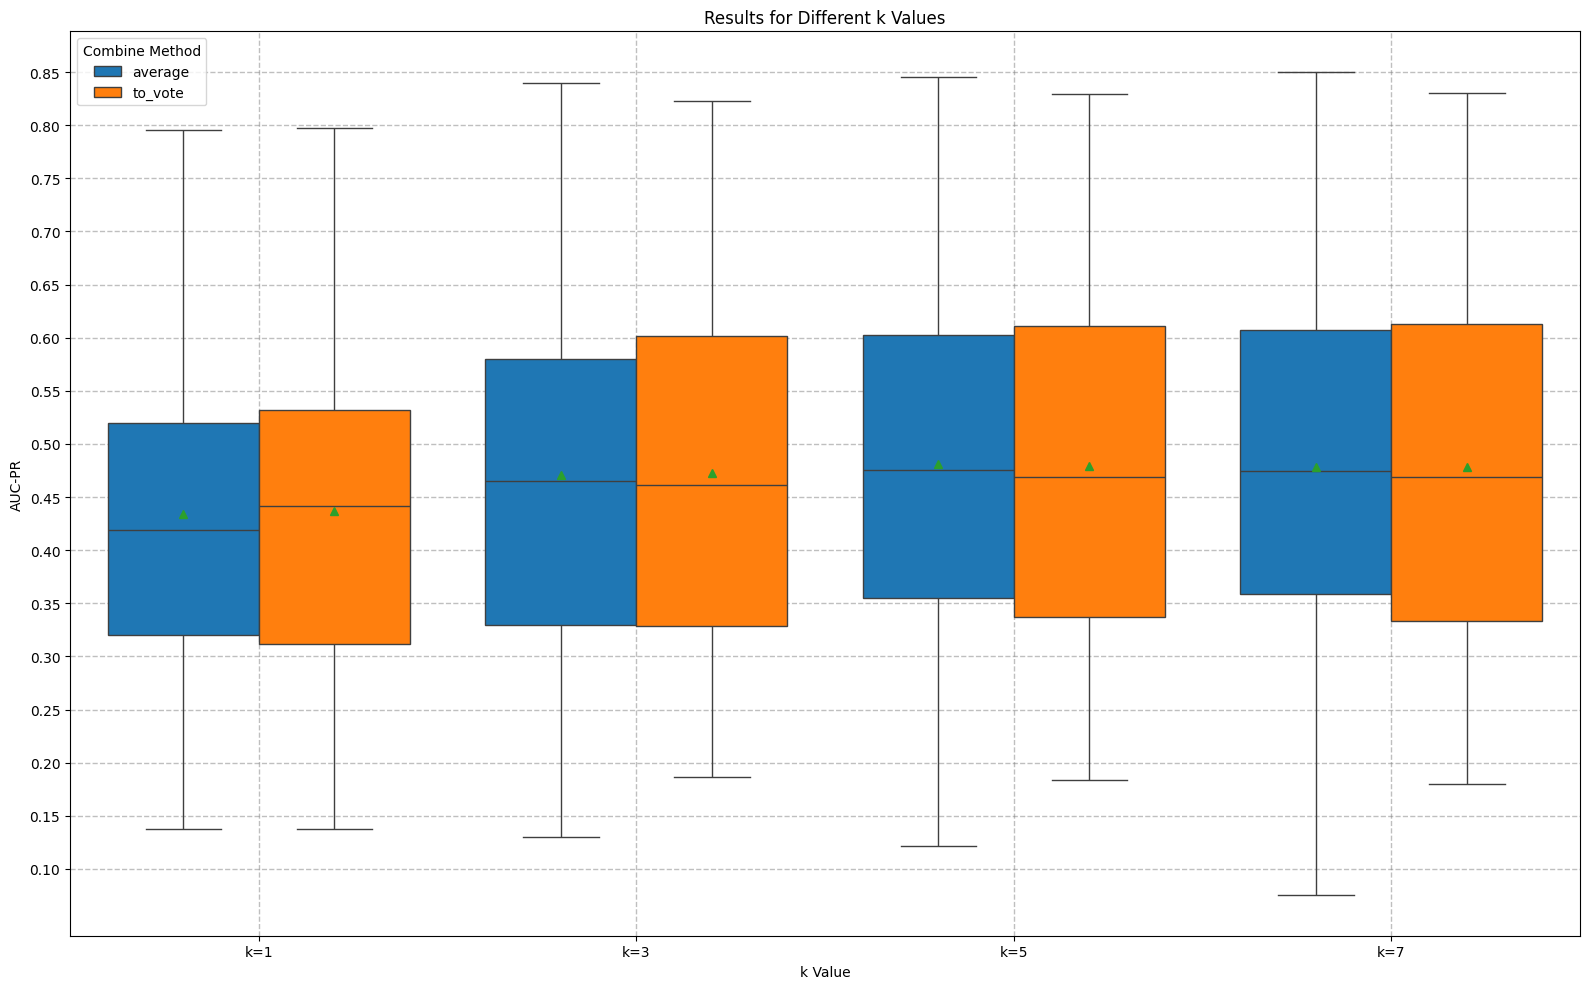

In [118]:
# Create boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x='k', y='value', hue='Combine Method', data=reshaped_df, showfliers = False, saturation=1, showmeans=True)
plt.title('Results for Different k Values')
plt.xlabel('k Value')
plt.ylabel('AUC-PR')
plt.yticks(np.arange(0.1, .9, 0.05))
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.savefig(f'{save_fig_path}first_total_rough_results.png')
plt.show()

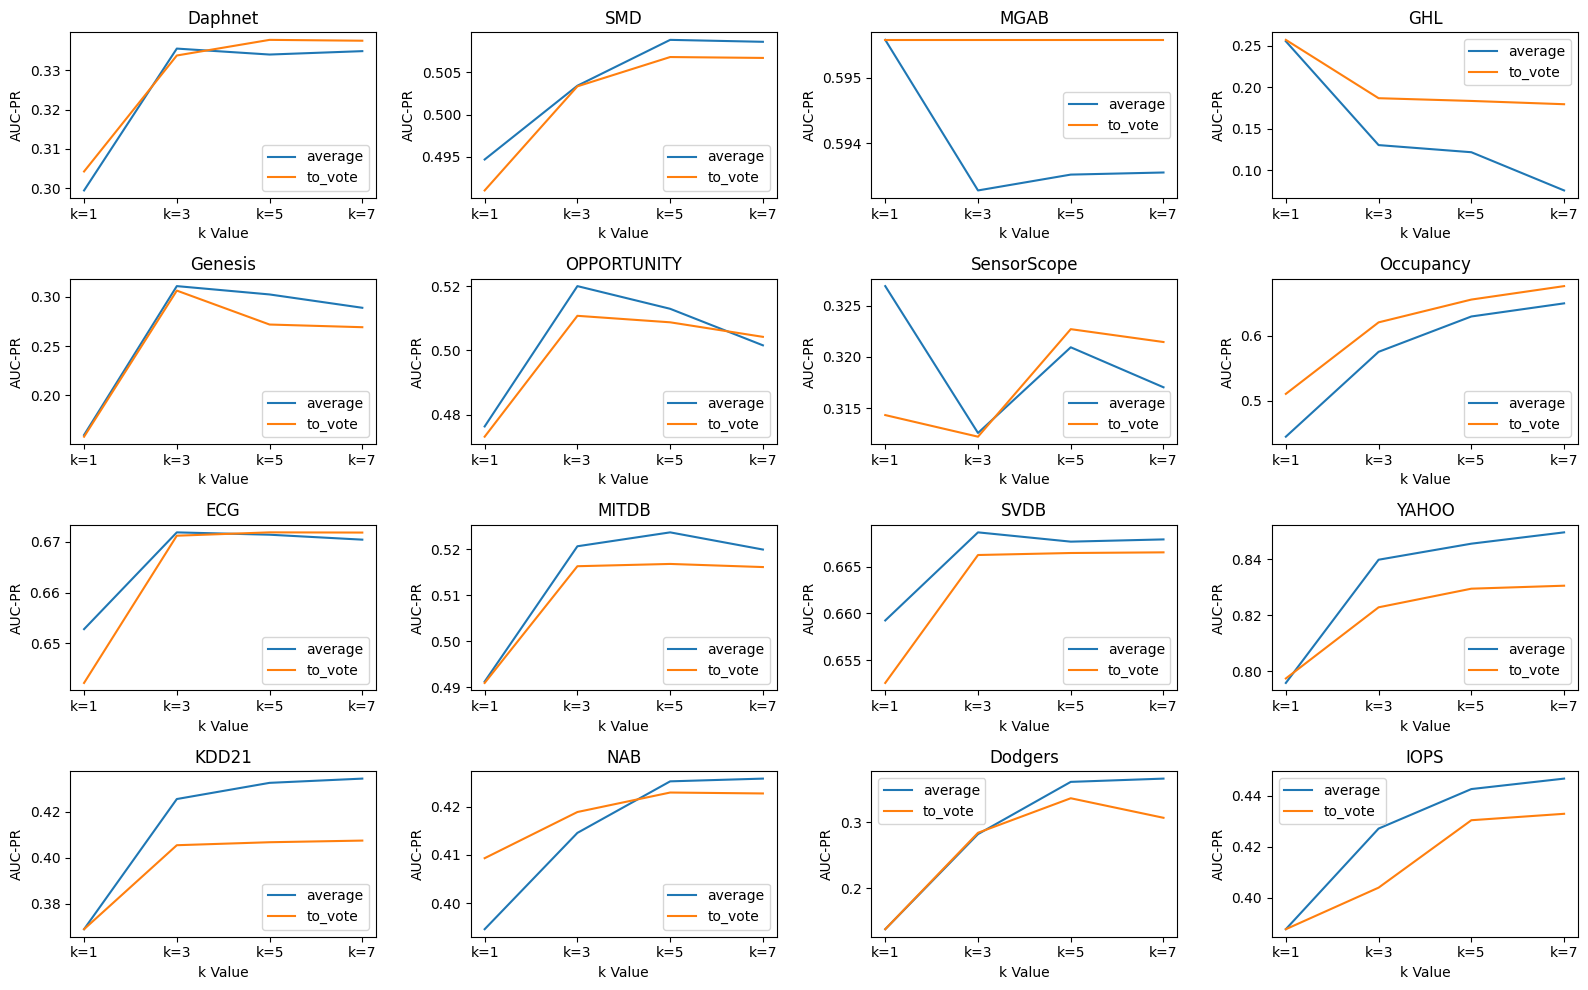

In [89]:
# Create subplot
plt.figure(figsize=(16, 10))

for i, filename in enumerate(os.listdir(csv_dir)):
    plt.subplot(4, 4, i + 1)

    # Plot data
    for method in ['average', 'to_vote']:
        sns.lineplot(data[i].loc[method], label=method)

    # Set title and labels
    plt.title(filename.replace('.csv', ''))
    plt.xlabel('k Value')
    plt.ylabel('AUC-PR')
plt.legend()
plt.tight_layout()
plt.savefig(f'{save_fig_path}first_per_dataset_rough_results.png')
